<h2 align="center">Effect of COVID-19 on 20 tech stocks</h2>
<p> COVID-19 has changed our lives. We are in lockdown, and have had to make major changes to our lifestyles. The stock market has had to deal with some drastic changes of its own. In this project I will explore the fate of some of tech stocks to see how good (or bad) they have braved the COVID-19 storm.

Disclaimer: this project is meant for some basic pandas and viz skills practice and **should not** be used to derive any financial advice. </p>

In [4]:
%%html
<style type="text/css">

 body {
     background-color: #4CB1F7;
     margin: 0;
     padding: 6em;
     font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
     font-size: 1em;
}



 h2 {
     color: #0339A6;
     height: 3em;
     width: 100%;
     margin-bottom: 1em;
     font-size: 2em;  
 }

div.output_area {
    width: 100%;
    font-size: 1.1em;
    color: #565656;
}

div.output_area pre {
    font-size: 1.1em;
    padding: 1.5em;
}

div.output_png.output_subarea {
    max-width: 100%;
}

</style>

In [5]:
import datetime

now = datetime.datetime.now()
print("Updated on:", now.strftime("%Y-%m-%d %H:%M:%S"))

Updated on: 2020-04-10 14:54:06


### Get the Data

In this section I use pandas to scrape data from Yahoo! finance using pandas.

In [5]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

The stock data for these tickers are queried from Jan 1st 2017 to current date and saved in their own dataframes.

stock tickers are as follows:
MSFT, AAPL, AMZN, GOOG, BABA, FB, INTC, NVDA, CRM, PYPL, TSLA, AMD, EA, MTCH, TTD, ZG, ATVI, YELP, TIVO and VMW

In [6]:
start = datetime.datetime(2017, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['MSFT','AAPL','AMZN','GOOG','BABA','FB','INTC','NVDA','CRM','PYPL','TSLA','AMD','EA','MTCH','TTD','ZG','ATVI','YELP','TIVO','VMW']
df_map = {}

for tick in tickers:
    stock = data.DataReader(tick, 'yahoo', start, end)
    df_map[tick] = stock

In [1]:
#Using pd.concat to concatenate the stock dataframes together to a single data frame called tech_stocks

In [7]:
tech_stocks = pd.concat(df_map,axis = 1,keys = tickers)
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks.tail()

Stock Ticker        MSFT                                                  \
Stock Info          High         Low        Open       Close      Volume   
Date                                                                       
2020-04-03    157.380005  152.190002  155.100006  153.830002  41243300.0   
2020-04-06    166.500000  157.580002  160.320007  165.270004  67111700.0   
2020-04-07    170.000000  163.259995  169.589996  163.490005  62769000.0   
2020-04-08    166.669998  163.500000  165.669998  165.130005  48318200.0   
2020-04-09    167.369995  163.330002  166.360001  165.139999  51385100.0   

Stock Ticker                    AAPL                                      ...  \
Stock Info     Adj Close        High         Low        Open       Close  ...   
Date                                                                      ...   
2020-04-03    153.830002  245.699997  238.970001  242.800003  241.410004  ...   
2020-04-06    165.270004  263.109985  249.380005  250.899994  262.470001  ...   
2020-04-07    163.490005  271.700012  259.000000  270.799988  259.429993  ...   
2020-04-08    165.130005  267.369995  261.230011  262.739990  266.070007  ...   
2020-04-09    165.139999  270.070007  264.700012  268.700012  267.989990  ...   

Stock Ticker  TIVO                                    VMW              \
Stock Info    Open Close     Volume Adj Close        High         Low   
Date                                                                    
2020-04-03    6.30  6.23  1223600.0      6.23  119.800003  114.730003   
2020-04-06    6.49  6.80  1248000.0      6.80  123.489998  119.080002   
2020-04-07    7.09  6.78  1284500.0      6.78  127.669998  122.639999   
2020-04-08    6.86  6.82  1133900.0      6.82  131.500000  124.099998   
2020-04-09    7.04  6.82  1479000.0      6.82  134.649994  129.839996   

Stock Ticker                                                 
Stock Info          Open       Close     Volume   Adj Close  
Date                                                         
2020-04-03    117.860001  116.970001  1330900.0  116.970001  
2020-04-06    122.559998  122.940002  1823600.0  122.940002  
2020-04-07    126.290001  123.550003  1827500.0  123.550003  
2020-04-08    124.900002  130.460007  1664800.0  130.460007  
2020-04-09    132.000000  131.429993  1051000.0  131.429993  

[5 rows x 120 columns]

What is the maximum and minimum of the Close price for each tech company's stock throughout the time period? Let's also use a bar plot to visualize the data as well.

Note: We use a log scale for close price to normalize the values to a uniform scale.

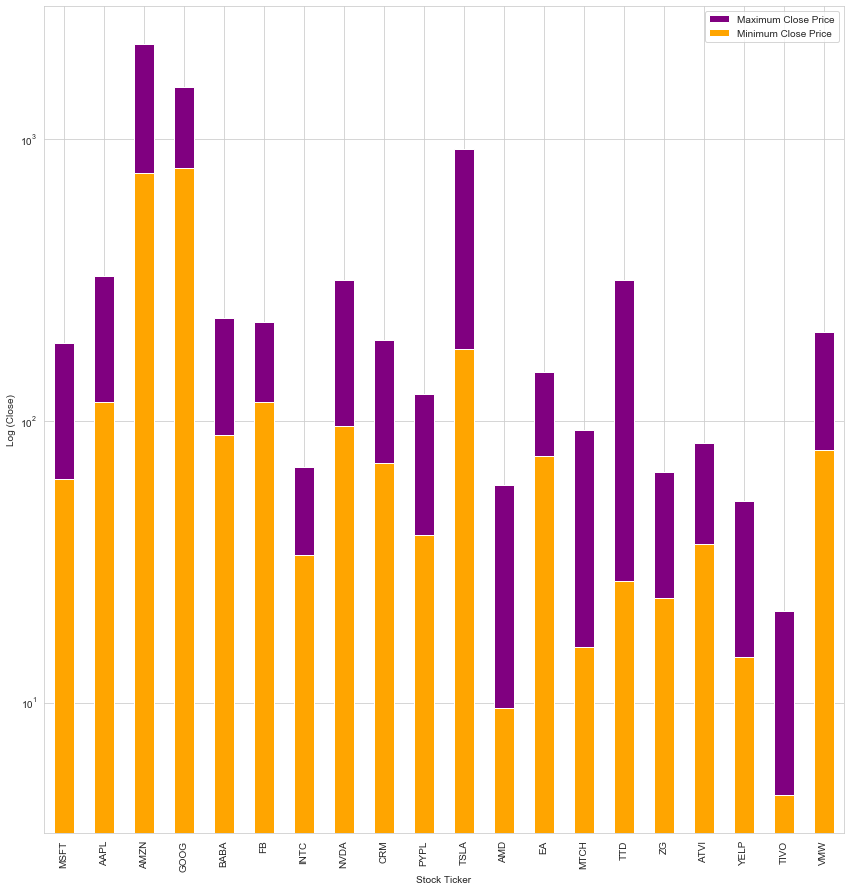

In [10]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
max_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()
min_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').min()
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='purple',label='Maximum Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Close Price')
plt.legend()

Using the bar-plot above, stocks can be classified into two broad groups: Reliable stocks and Volatile stocks. 

**Reliable stocks** are the ones that didnot show much difference between the minimum Close price and maximum Close Price in the time period specified. e.g.: GOOG and AMZN. 
**Volatile stocks** are the ones that fluctate the most between the minimum and maximum closing price of stocks. e.g.: TTD and TIVO

However, a more interesting comparison is to compare the same data against two separate time-periods: Pre-COVID-19 and Post-COVID-19.

Text(0.5, 1.0, 'Post COVID-19: Jan 2020 - Today')

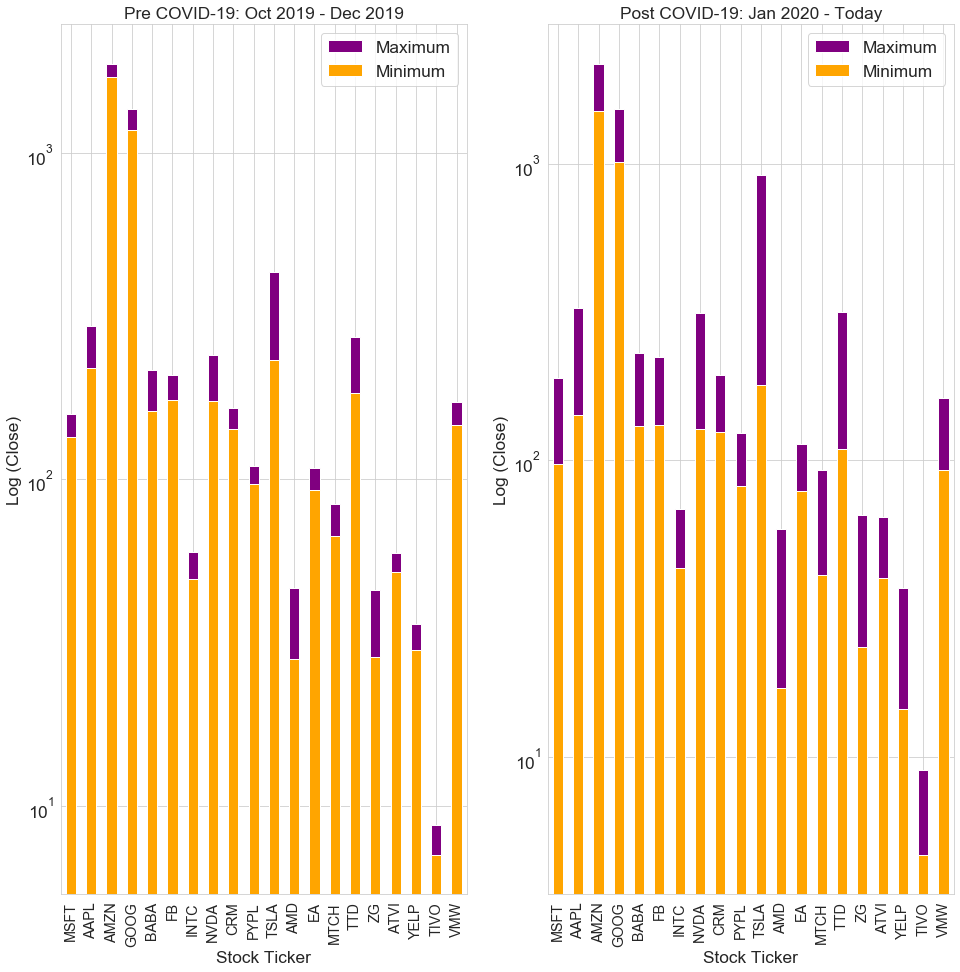

In [13]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
current_date_str = datetime.date.today().strftime("%Y-%m-%d") #to store the current date as a string
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,16))


max_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].max()
min_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='purple')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Pre COVID-19: Oct 2019 - Dec 2019')

max_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2020-01-01':current_date_str].max()
min_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':current_date_str].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='purple')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('Post COVID-19: Jan 2020 - Today')


It is clear that the more **Reliable** stocks like AAPL and AMZN in the pre COVID-19 period saw significant volatility in their closing prices once the COVID-19 storm hit.    

The next analysis is to use pandas pct_change() method on the Close column to create a **Returns** value. A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [14]:
returns = pd.DataFrame() #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.tail()

,MSFT Return,AAPL Return,AMZN Return,GOOG Return,BABA Return,FB Return,INTC Return,NVDA Return,CRM Return,PYPL Return,TSLA Return,AMD Return,EA Return,MTCH Return,TTD Return,ZG Return,ATVI Return,YELP Return,TIVO Return,VMW Return
Date,,,,,,,,,,,,,,,,,,,,
2020-04-03,-0.009210,-0.014371,-0.006379,-0.020485,-0.009476,-0.025349,-0.004048,-0.045250,-0.000075,-0.012083,0.056197,-0.042706,0.005279,0.024280,-0.026642,0.016495,-0.013162,-0.029462,-0.018898,-0.010406
2020-04-06,0.074368,0.087237,0.047729,0.081102,0.049917,0.073745,0.079438,0.100406,0.098578,0.100444,0.075478,0.115755,0.035787,0.073940,0.184924,0.234618,0.027009,0.131932,0.091493,0.051039
2020-04-07,-0.010770,-0.011582,0.007013,-0.000345,0.007890,0.019813,-0.000513,-0.034911,-0.016808,-0.013672,0.056582,0.000842,-0.001784,0.025873,0.006788,0.019989,-0.028084,0.003610,-0.002941,0.004962
2020-04-08,0.010031,0.025595,0.015609,0.020034,-0.010202,0.032281,0.009931,0.030576,0.041704,0.047667,0.006215,0.025862,0.004515,-0.013822,0.083673,0.037584,0.020043,0.112025,0.005900,0.055929
2020-04-09,0.000061,0.007216,-0.000117,0.000967,0.001990,0.005222,-0.031197,-0.014984,0.022697,0.007424,0.044020,-0.008403,-0.009363,-0.015894,0.030914,0.036740,-0.009989,-0.090111,0.000000,0.007435


A looks at the minimum and maximum returns for each stock tick in this time-period:

In [7]:
returns.idxmin()

MSFT Return   2020-03-16
AAPL Return   2020-03-16
AMZN Return   2020-03-12
GOOG Return   2020-03-16
BABA Return   2020-03-16
FB Return     2018-07-26
INTC Return   2020-03-16
NVDA Return   2018-11-16
CRM Return    2020-03-16
PYPL Return   2020-03-16
TSLA Return   2020-03-16
AMD Return    2017-05-02
EA Return     2019-02-06
MTCH Return   2018-05-01
TTD Return    2020-03-16
ZG Return     2018-11-07
ATVI Return   2018-11-09
YELP Return   2018-11-09
TIVO Return   2020-03-16
VMW Return    2018-01-29
dtype: datetime64[ns]

It is interesting to note that most of these stocks had their lowest return in March 2020

In [8]:
returns.idxmax()

MSFT Return   2020-03-13
AAPL Return   2020-03-13
AMZN Return   2017-10-27
GOOG Return   2019-07-26
BABA Return   2017-06-08
FB Return     2019-01-31
INTC Return   2020-03-13
NVDA Return   2017-05-10
CRM Return    2018-11-28
PYPL Return   2020-03-24
TSLA Return   2020-02-03
AMD Return    2019-01-30
EA Return     2019-02-08
MTCH Return   2019-08-07
TTD Return    2018-05-11
ZG Return     2019-02-22
ATVI Return   2017-02-10
YELP Return   2017-08-04
TIVO Return   2020-02-19
VMW Return    2020-03-13
dtype: datetime64[ns]

And for some, their highest returns were seen in March 2020 as well thereby confirming that the COVID-19 has indeed rendered the stock market more unpredictable than in the recent past.

Now, two new series, named `pre_corona` and `post_corona` are initialised with the standard deviation of stock returns from October - December 2019 and standard deviation of stock returns from January - March 2020, respectively. This series is sorted and hence if the stocks occur at the right end of the chart, they are deemed **volatile** with significant values of standard deviation whereas if they occur on the left they could be deemed **reliable**.

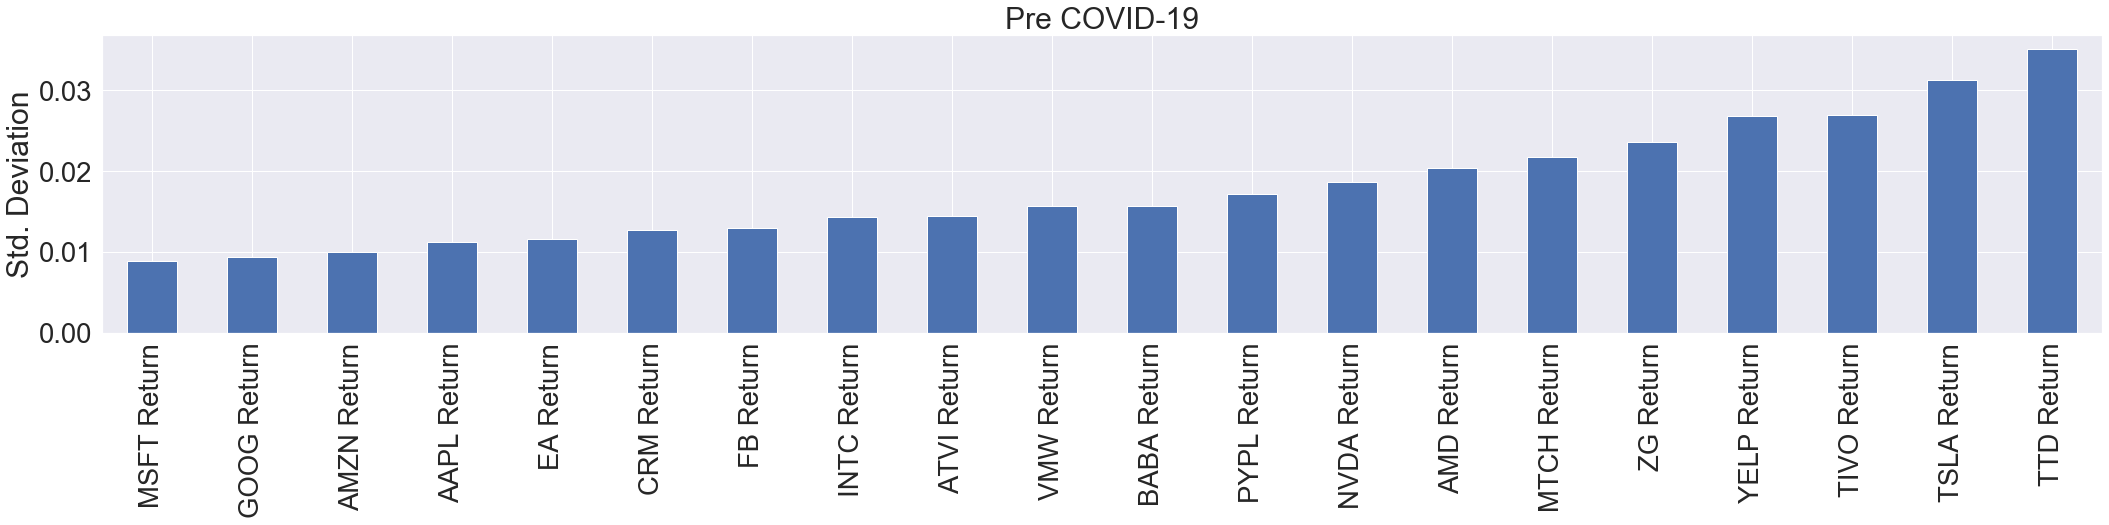

In [16]:
pre_corona=returns.loc['2019-10-01':'2019-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
pre_corona.sort_values().plot.bar(title="Pre COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

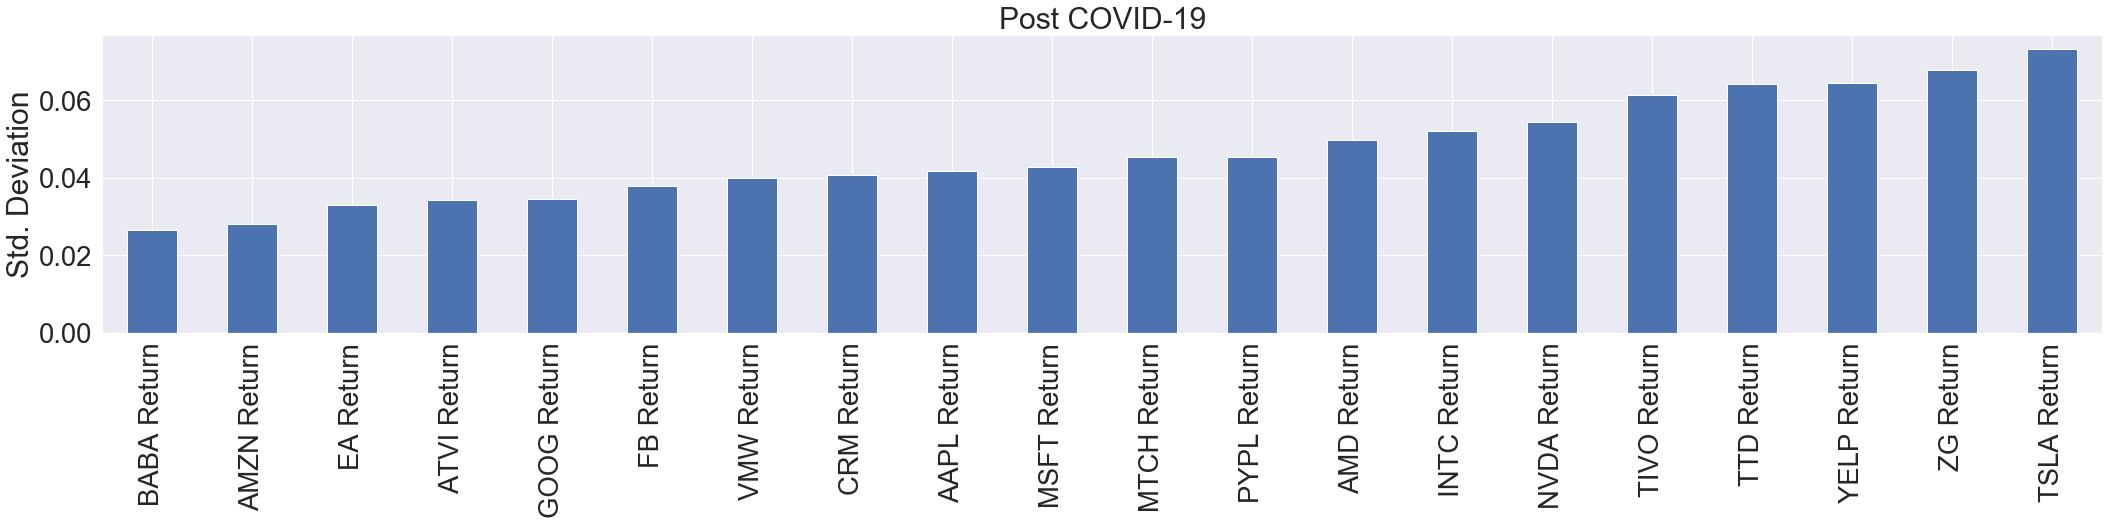

In [17]:
post_corona=returns.loc['2020-01-01':current_date_str].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
post_corona.sort_values().plot.bar(title="Post COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

It is clear that MSFT has suffered the most - shifting from the most **reliable** stock to a relatively **volatile** stock due to this pandemic!

From the above collection, let's choose 5 stocks that have suffered significant effects. I am picking the following - MSFT, BABA, AAPL, MTCH and ATVI

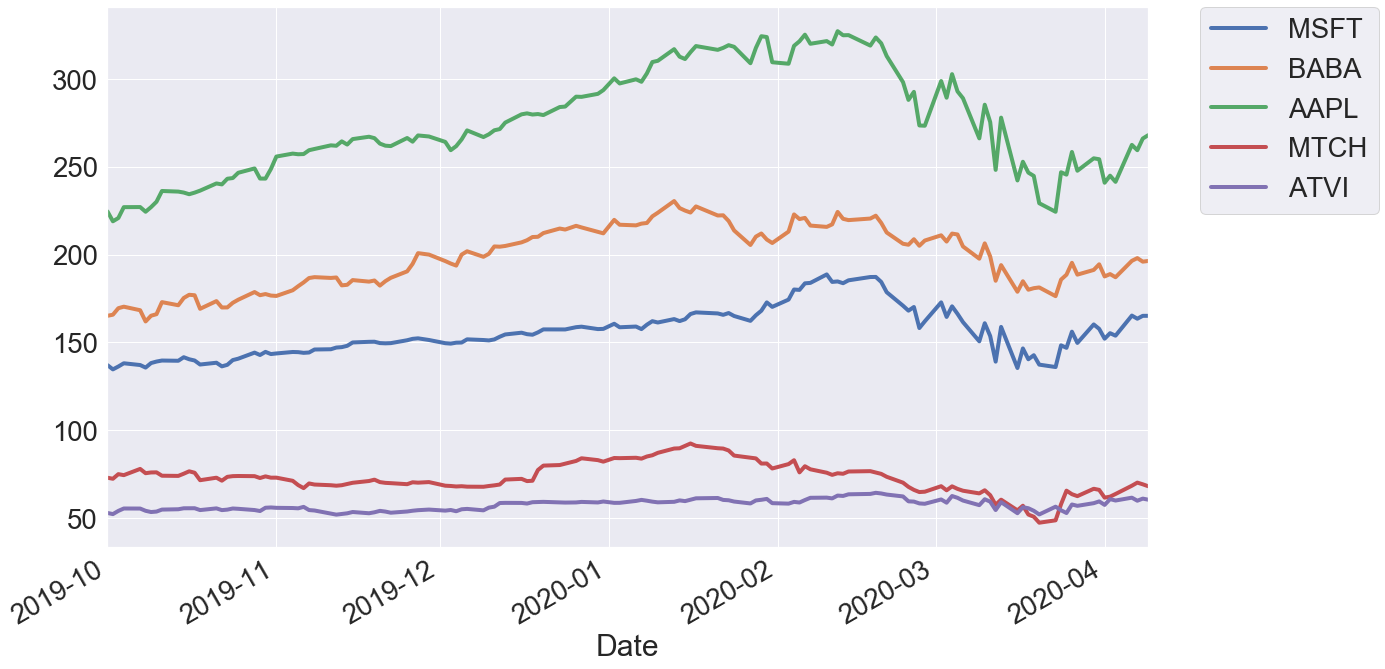

In [18]:
selected_tickers = ['MSFT', 'BABA', 'AAPL', 'MTCH','ATVI']
selected_tech_stocks = pd.concat([df_map['MSFT'],df_map['BABA'],df_map['AAPL'],df_map['MTCH'],df_map['ATVI']],axis=1,keys=selected_tickers)
selected_tech_stocks.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':current_date_str].plot(figsize=(20,10),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

Finally: Using a heatmap of the correlation between the selected stocks Close Price

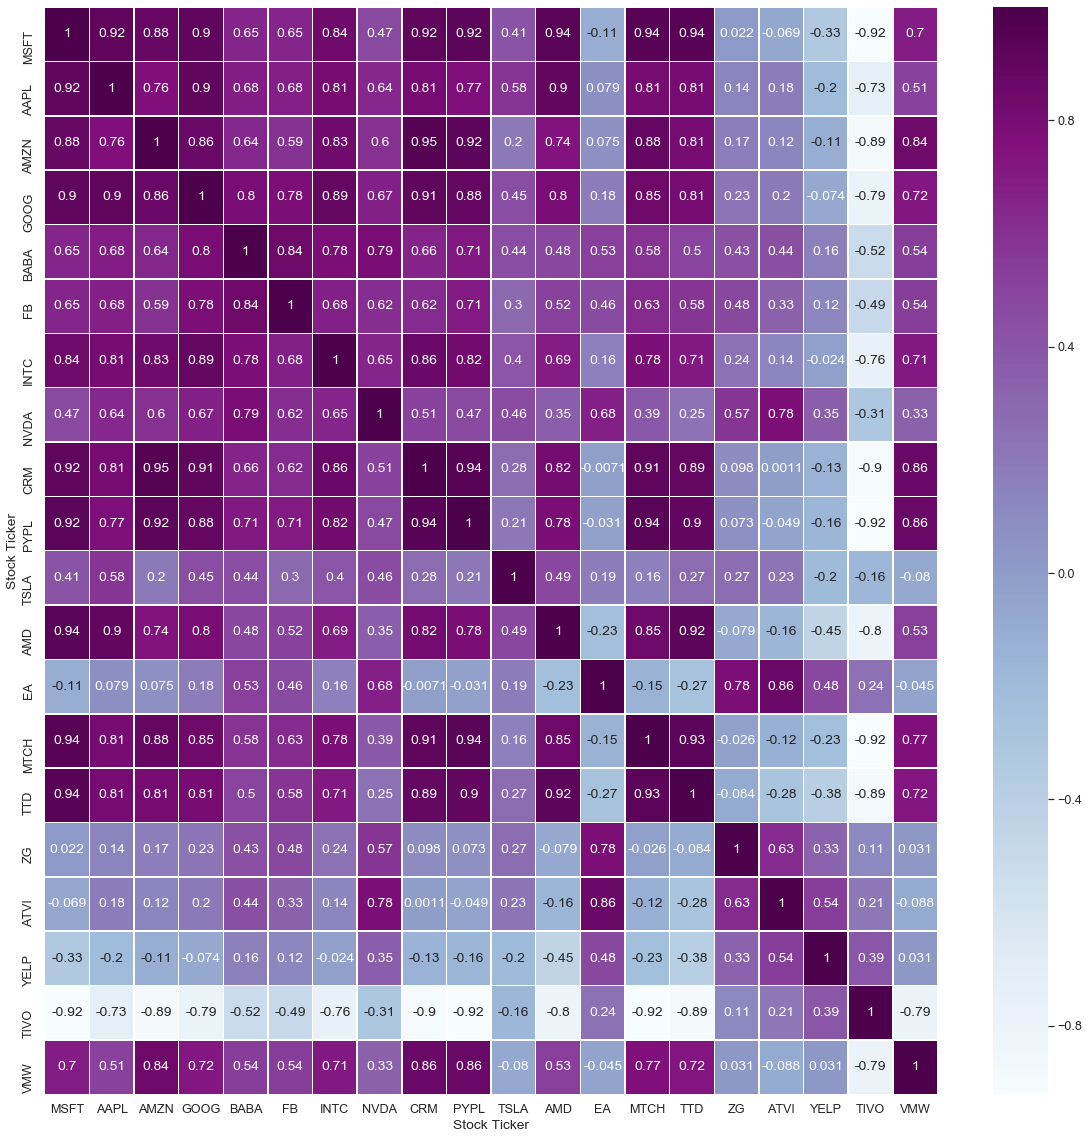

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),linewidths=.5,cmap='BuPu',annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()